In [11]:
# Import library
import pandas as pd
import os
import random
import numpy as np

#Melakukan iterasi melalui semua direktori dan file dalam sebuah folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_93.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_51.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_11.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_16.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_45.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_96.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_91.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_90.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_2.txt
/kaggle/input/riped-and-unriped-

# Import

In [12]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load Dataset

In [13]:
#Load data & Jumlah data tomat matang dan mentah
images_dir = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images'
riped_images = []
unriped_images = []
for file_name in os.listdir(images_dir):
    file_path = os.path.join(images_dir,file_name)
    if file_name.endswith('jpeg'):
        if 'unriped' in file_name:
            unriped_images.append(file_path)
        else:
            riped_images.append(file_path)

print(len(riped_images))
print(len(unriped_images))

97
80


In [14]:
# Jumlah semua data
len(os.listdir(images_dir))

177

In [15]:
#Mengetahui tomat mentah index pertama [0]
unriped_images[0]

'/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_54.jpeg'

In [16]:
#Mengetahui tomat matang index pertama [0]
riped_images[0]

'/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_74.jpeg'

# Train/Test Split

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array,array_to_img

# Define image dimensions
img_height = 150
img_width = 150

def preprocess_image(image_path, img_height, img_width):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

def load_and_preprocess_images(image_paths, img_height, img_width):
    images = [preprocess_image(img_path, img_height, img_width) for img_path in image_paths]
    return np.array(images)

# Load and preprocess images
riped_images_processed = load_and_preprocess_images(riped_images, img_height, img_width)
unriped_images_processed = load_and_preprocess_images(unriped_images, img_height, img_width)

# Create labels
riped_labels = np.ones(len(riped_images))
unriped_labels = np.zeros(len(unriped_images))

# Combine datasets
X = np.concatenate((riped_images_processed, unriped_images_processed), axis=0)
y = np.concatenate((riped_labels, unriped_labels), axis=0)


In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1000).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


# Define Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train

In [21]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.5228 - loss: 6.7359 - val_accuracy: 0.5833 - val_loss: 2.0983
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.7631 - loss: 2.5398 - val_accuracy: 0.5833 - val_loss: 1.5537
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.7866 - loss: 1.5440 - val_accuracy: 0.8889 - val_loss: 0.5796
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.8452 - loss: 0.6940 - val_accuracy: 0.9167 - val_loss: 0.2759
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step - accuracy: 0.9050 - loss: 0.4737 - val_accuracy: 0.9167 - val_loss: 0.2390
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.9494 - loss: 0.1242 - val_accuracy: 0.9722 - val_loss: 0.1301
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.9593 - loss: 0.1391 - val_accuracy: 0.9722 - val_loss: 0.1684
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.9578 - loss: 0.1214 - val_accuracy: 0.9167 - val_loss:

# Evaluation

In [22]:
val_loss, val_accuracy = model.evaluate(val_dataset,return_dict=True).values()
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
model.evaluate(val_dataset,return_dict=True)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9421 - loss: 0.2599 
Validation Loss: 0.9444444179534912
Validation Accuracy: 0.24951015412807465
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9421 - loss: 0.2599 


{'accuracy': 0.9444444179534912, 'loss': 0.24951015412807465}

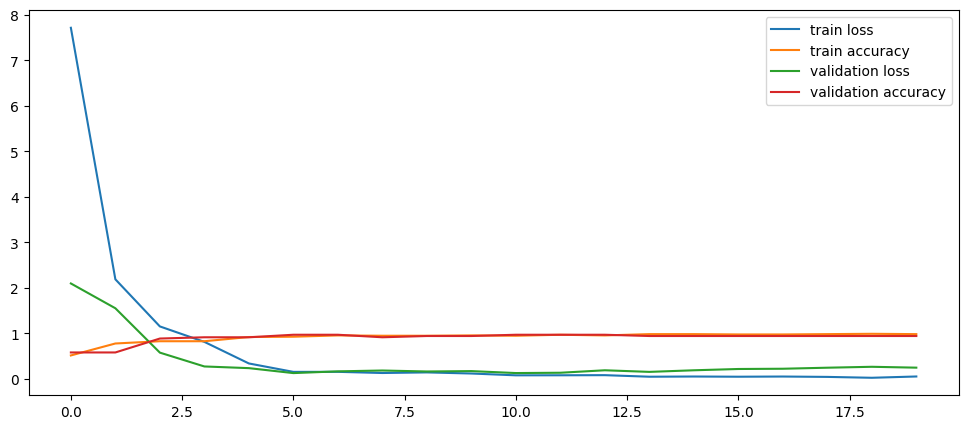

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Testing

In [24]:
def show_image_and_predict_from_array(model, val_image_index):
    image_array = X_val[val_image_index]
    # Ensure the image is in the correct shape and normalized
    if image_array.ndim == 3:
        image_array = np.expand_dims(image_array, axis=0)
    if image_array.max() > 1.0:
        image_array = image_array / 255.0

    # Predict the label
    prediction = model.predict(image_array)
    label = 'Ripe' if prediction[0] > 0.5 else 'Unripe'
    target_label = 'Ripe' if y_val[val_image_index] > 0.5 else 'Unripe'

    # Display the image and print the prediction
    plt.imshow(image_array[0])
    plt.title(f'Predicted: {label}')
    plt.axis('off')
    plt.show()
    print(f'Target label: {target_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


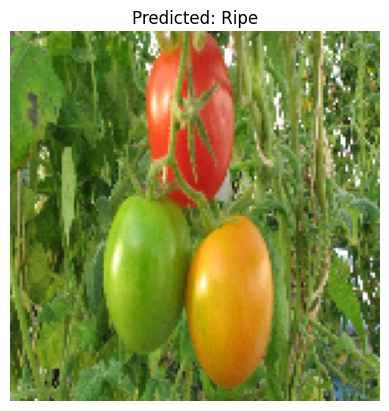

Target label: Ripe


In [25]:
for index in range(len(X_val)):
    show_image_and_predict_from_array(model, index)
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


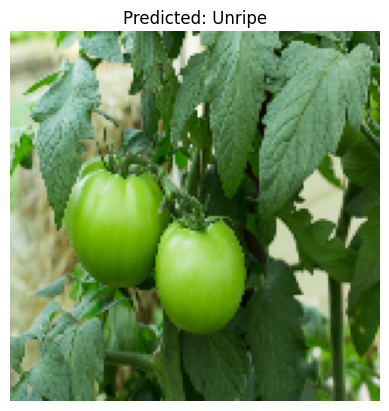

In [38]:
# Fungsi untuk memproses gambar dan menampilkan prediksi
def show_image_and_predict(image_path, model, img_height=150, img_width=150):
    if os.path.isfile(image_path):
        img = load_img(image_path, target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0  # Normalisasi
        img = np.expand_dims(img, axis=0)
        
        # Prediksi label
        prediction = model.predict(img)
        label = 'Ripe' if prediction[0] > 0.5 else 'Unripe'
        
        # Menampilkan gambar dan prediksi
        plt.imshow(img[0])
        plt.title(f'Predicted: {label}')
        plt.axis('off')
        plt.show()
    else:
        print("Path tidak valid.")

# Path gambar yang ingin diuji
image_path = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_1.jpeg'
# Menguji gambar dengan path yang sudah ditentukan
show_image_and_predict(image_path, model)

# Visualisation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


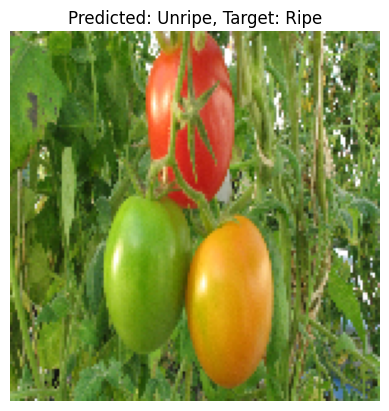

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


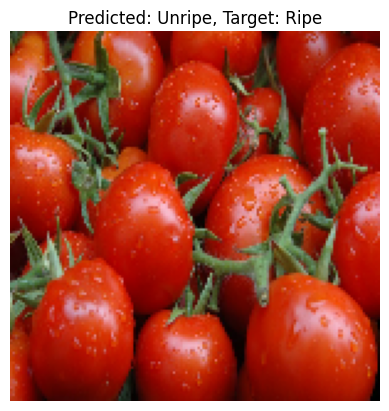

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


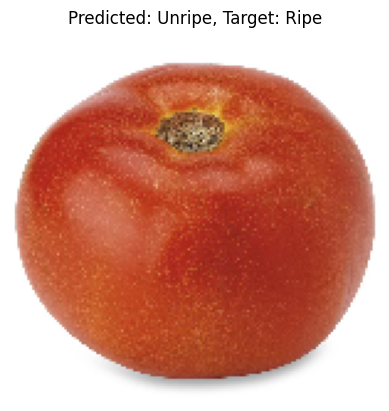

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


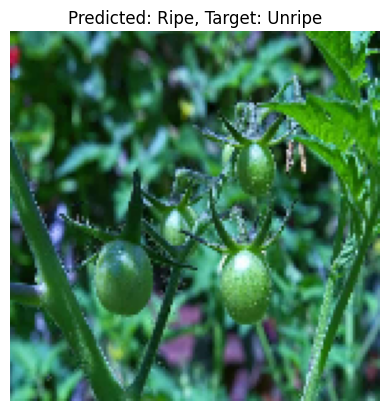

Predicted label: Ripe
Target label: Unripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


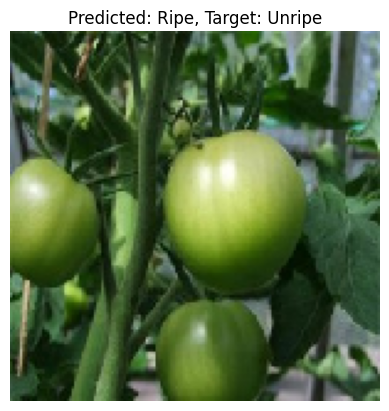

Predicted label: Ripe
Target label: Unripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


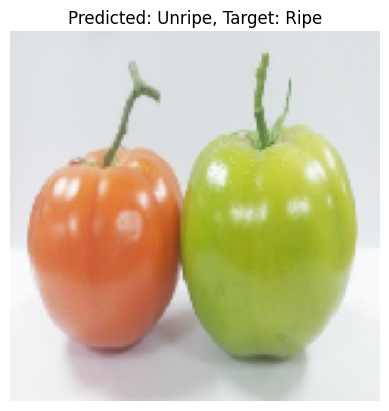

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


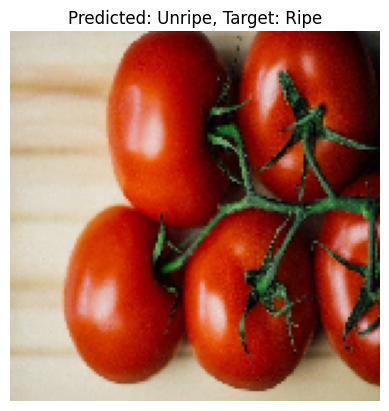

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


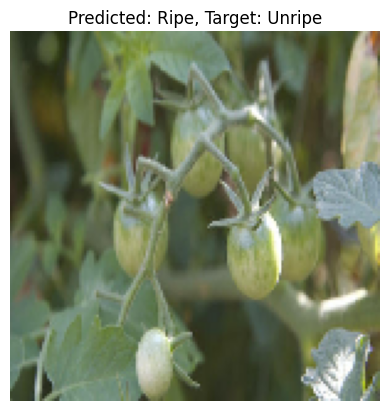

Predicted label: Ripe
Target label: Unripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


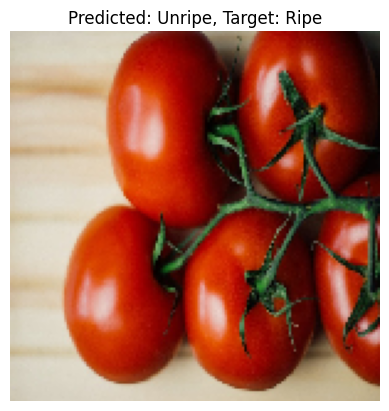

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


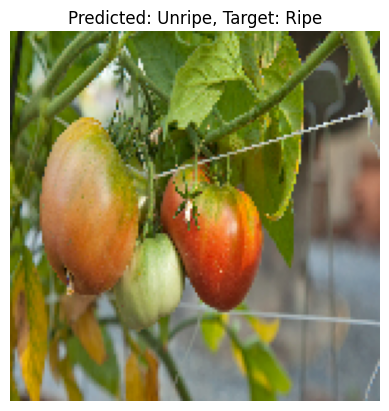

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


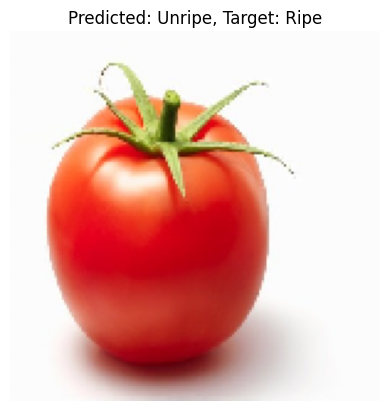

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


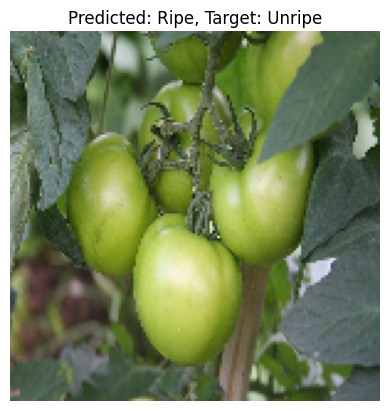

Predicted label: Ripe
Target label: Unripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


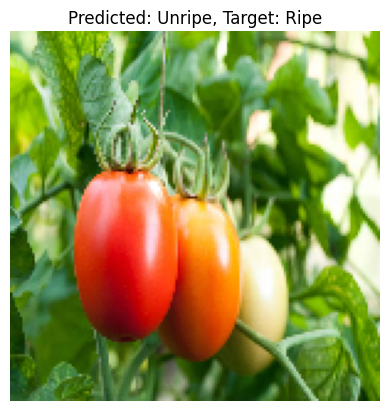

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


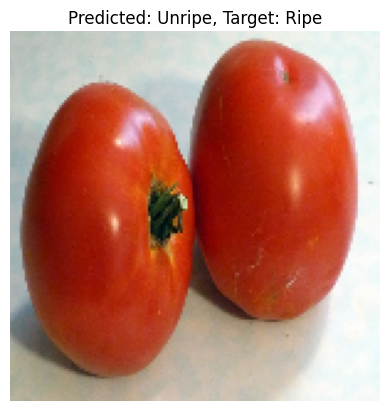

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


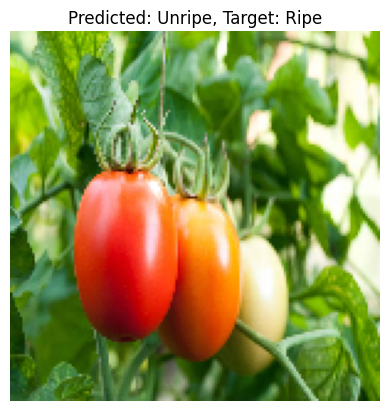

Predicted label: Unripe
Target label: Ripe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [48]:
# Menampilkan prediksi yang salah
def show_wrong_predictions(model, X_val, y_val):
    for i in range(len(X_val)):
        image_array = X_val[i]
        true_label = y_val[i]

        if image_array.ndim == 3:
            image_array = np.expand_dims(image_array, axis=0)

        prediction = model.predict(image_array)
        predicted_label = 1 if prediction[0] > 0.5 else 0

        if predicted_label != true_label:
            predicted_label_str = 'Ripe' if predicted_label == 1 else 'Unripe'
            true_label_str = 'Ripe' if true_label == 1 else 'Unripe'

            plt.imshow(image_array[0])
            plt.title(f'Predicted: {predicted_label_str}, Target: {true_label_str}')
            plt.axis('off')
            plt.show()
            print(f'Predicted label: {predicted_label_str}')
            print(f'Target label: {true_label_str}')

show_wrong_predictions(model, X_val, y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


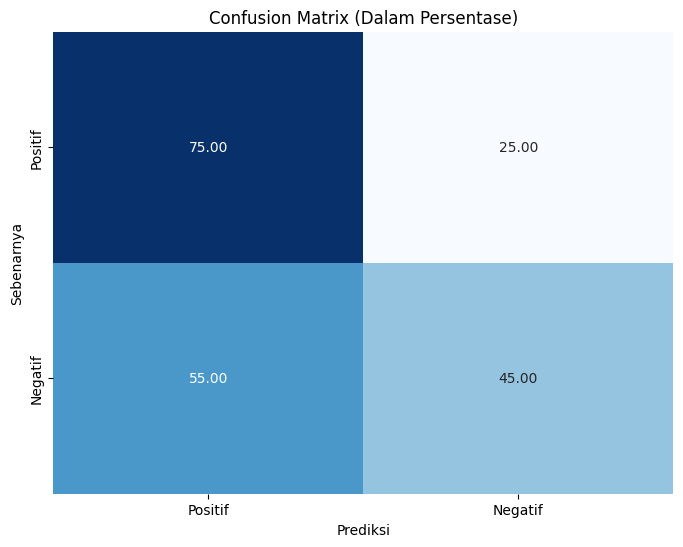

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Prediksi')
    plt.ylabel('Sebenarnya')
    plt.title('Confusion Matrix (Dalam Persentase)')
    plt.show()

# Prediksi semua data validasi
y_pred = (model.predict(X_val) > 0.5).astype(int)

# Visualisasi Confusion Matrix
labels = ['Positif', 'Negatif']
plot_confusion_matrix(y_val, y_pred, labels)